In [35]:
import cv2
from matplotlib import pyplot as plt
import imutils
import random

%matplotlib inline  

In [15]:
ann = 'data/labels.txt'
img_folder = 'data/depth/'

In [3]:
# read the lables 
with open(ann) as f:
    first_line = f.readline()
    
label = first_line.split()

print label

['seq0_0000_0', '-1', '5', '517', '258', '2']


In [17]:
print img_folder + label[0] + '.pgm'

data/depth/seq0_0000_0.pgm


In [102]:
def parse_lables (ann, img_folder, labels=[]):
    all_imgs = []
    seen_labels = {}
    prev = []
    
    with open(ann) as f:
        lines = f.readlines()
        
    for line in sorted(lines):
        split_line = line.split()
            
        name = img_folder + split_line[0] + '.pgm'
        
        
#         if the image is new - create a new one, in not - add to the exsisting one
        if name != prev:
            img = {'object':[]}
            img['filename'] = name
            
            image = cv2.imread(img['filename'])
            img['width'], img['height'] = image.shape[:2]
        
        
        
#         read the box annotation
        obj = {}
        obj['xmin'] = int(round(float(split_line[1])))
        obj['ymin'] = int(round(float(split_line[2])))
        obj['xmax'] = int(round(float(split_line[3]))) + int(round(float(split_line[1])))
        obj['ymax'] = int(round(float(split_line[4]))) + int(round(float(split_line[2])))
        obj['label'] = split_line[5]
        
        img['object'] += [obj]
        
        prev = img['filename'] # previous object filename
        
        
        
        if obj['label'] in seen_labels:
            seen_labels[obj['label']] += 1
        else:
            seen_labels[obj['label']] = 1
    
    
        if len(img['object']) > 0:
            all_imgs += [img]
    
    return all_imgs, seen_labels

In [103]:
images, seen_labels = parse_lables(ann, img_folder, labels=[])

In [109]:
names=[]
for r in images:
    names += [r['filename']]
    
print len(names)    
print len(set(names))
print len(images)

len(set([i['filename'] in images]))

4498
2350
4498


TypeError: string indices must be integers, not str

In [121]:
def pr(x): print x

In [128]:
[pr(i['filename']) for i in images[:2]]

data/depth/seq0_0000_0.pgm
data/depth/seq0_0000_0.pgm


[None, None]

In [66]:
idx = random.randint(0, len(images))
print(idx)
images[idx]

927


{'filename': 'data/depth/seq0_0295_0.pgm',
 'height': 640,
 'object': {'label': '1', 'xmax': 383, 'xmin': 224, 'ymax': 181, 'ymin': 102},
 'width': 480}

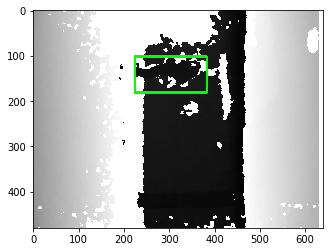

In [67]:
tmp = images[idx]
img = cv2.imread(tmp['filename'])

# plt.imshow(img) 

boximg = cv2.rectangle(img,(tmp['object']['xmin'],tmp['object']['ymin']),(tmp['object']['xmax'],tmp['object']['ymax']),(0,255,0),3)
plt.imshow(boximg)

In [60]:
obj = tmp['object']
print obj


[{'xmin': 226, 'ymin': 59, 'ymax': 149, 'xmax': 407, 'label': '1'}]


In [ ]:
ob

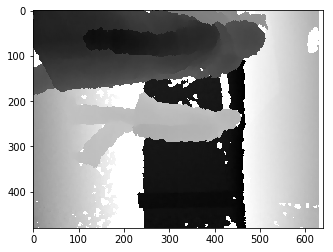

In [12]:
# rotate the images  90 degrees

 
# read image as grey scale
img = cv2.imread('data/depth/seq0_0000_0.pgm')

plt.imshow(img) 
# plt.title('original')

# Draw a diagonal blue line with thickness of 5 px
# boximg = cv2.rectangle(img,(-1,5),(-1+517,5+258),(0,255,0),3)
# plt.imshow(boximg)
    
    
# cv2.drawContours(img,[box],0,(0,0,255),2)


# get image height, width
(h, w) = img.shape[:2]

# calculate the center of the image
center = (w / 2, h / 2)
 



In [ ]:
# Perform the counter clockwise rotation holding at the center
# 90 degrees
# M = cv2.getRotationMatrix2D(center, 90, 1.0)
# rotated90 = cv2.warpAffine(img, M, (h, w))
 
# cv2.imwrite( "data/rotated.png", rotated90 );

# plt.imshow(rotated90) 
# plt.title('rotated')

Text(0.5,1,'rotated')

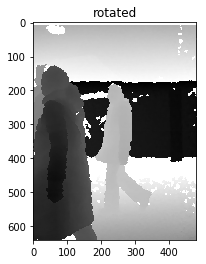

In [13]:
rotated = imutils.rotate_bound(img, 270)


plt.imshow(rotated) 
plt.title('rotated')

In [ ]:
# cv2.imshow('Original Image',img)
# cv2.waitKey(0) # waits until a key is pressed
# cv2.destroyAllWindows() # destroys the window showing image
 
cv2.imshow('Image rotated by 90 degrees',rotated90)
cv2.waitKey(0) # waits until a key is pressed
cv2.destroyAllWindows() # destroys the window showing image
 

In [ ]:
f = open(annot,'r')
while True:
    text = f.readline()
    if 'rawr' in text:
        print text

In [ ]:
from os import listdir
from os.path import isfile, join
all = [f for f in listdir('data/')]

In [ ]:
print onlyfiles

In [ ]:
# randomly split to  test/validation making sure we have all the labels